In [1]:
import  resnet18_linknet as ln
import tensorflow as tf
import cv2
import numpy as np

In [2]:
inputs = tf.placeholder(tf.float32, shape=[None, 256, 256, 3])
phase  = tf.placeholder(tf.bool)
model = ln.LinkNet_resnt18(inputs, is_training=phase,num_classes=3)
result, end_points = model.build_model()

with open("../../data/NYUD/guptaRGB.txt") as fh:
     images = [cv2.resize(cv2.imread(i[:-1]),(256,256)) for i in fh]
images=np.array(images[:10])
images = images.reshape([-1,256,256,3])

In [3]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output =sess.run(result,feed_dict={inputs : images,phase:True})

In [4]:
output.shape

(10, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


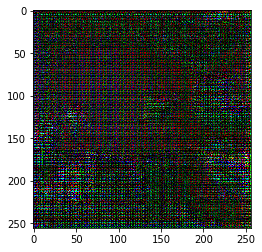

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(output[0])
plt.show()